___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [49]:
df1 = pd.read_csv("ANSUR II FEMALE Public.csv")
df1.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [50]:
df2 = pd.read_csv("ANSUR II MALE Public.csv",  encoding = "latin-1")
df2

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [51]:
df=pd.concat([df1,df2], axis=0, ignore_index=True)
df

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,44

## Explore Data

In [52]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    SubjectId                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [53]:
df.isnull().sum()

SubjectId                         4082
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [54]:
df.drop(["subjectid","SubjectId","Ethnicity"],axis=1,inplace=True)

In [55]:
df.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670
std,37.400106,79.091048,20.720018,

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [56]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [57]:
df['DODRace'] = df['DODRace'].map({1: 'White',
                  2: 'Black',
                  3: 'Hispanic',
                  4: 'Asian',
                  5: 'Native_American',
                  6: 'Pacific_Islander',
                  8: 'Other'})

In [58]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific_Islander      59
Native_American       49
Other                  3
Name: DODRace, dtype: int64

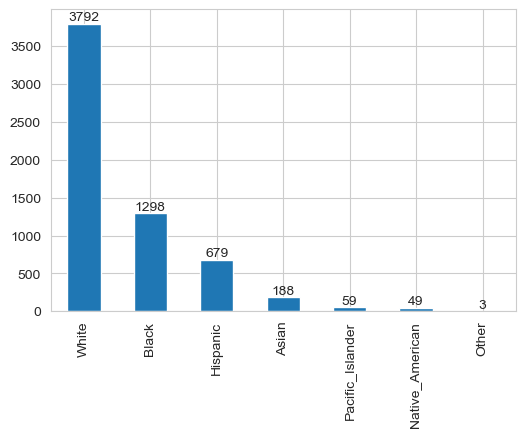

In [59]:

ax=df.DODRace.value_counts().plot(kind="bar")

for container in ax.containers:
    ax.bar_label(container);


In [60]:
df = df[(df['DODRace']== "White")|(df['DODRace']== "Black")|(df['DODRace']== "Hispanic")]

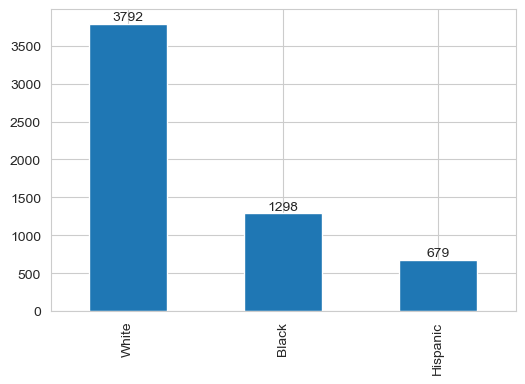

In [61]:
ax=df.DODRace.value_counts().plot(kind="bar")

for container in ax.containers:
    ax.bar_label(container);

In [62]:
df_object = df.select_dtypes(include ="object").head()
df_object

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,WritingPreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,Black,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Hispanic,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,White,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Black,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,White,Right hand


In [63]:
df.drop(["Date","Installation","Component","Branch","PrimaryMOS","WritingPreference"],axis=1,inplace=True)

In [64]:
df.SubjectsBirthLocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [65]:
df.corr().T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,Age,Heightin,Weightlbs
abdominalextensiondepthsitting,1.000000,0.351934,0.312919,0.518896,0.280824,0.456729,0.332593,0.417617,0.691126,0.505856,0.724344,0.366155,0.530905,0.626294,0.519677,0.739481,0.840828,0.245897,0.476406,0.323680,0.658512,0.337354,0.627868,0.825830,0.778442,0.296234,0.189045,0.463251,0.199866,0.242192,0.403525,0.139829,0.264128,0.279748,0.439103,0.345232,0.345895,0.628312,0.728934,0.306099,0.415260,0.419302,0.457253,0.301289,0.361741,0.363256,0.329280,0.502539,0.437203,0.595173,0.554712,0.256398,0.258762,0.599371,0.542195,0.275256,0.348528,0.220816,0.348377,0.674410,0.294322,0.656883,0.627212,0.321105,0.310547,0.149468,0.280206,0.637863,0.287179,0.187664,0.274283,0.422614,0.276912,0.318242,0.307952,0.352710,0.293471,0.730017,0.724702,0.389444,0.260747,0.186359,0.230967,0.728538,0.572029,0.858962,0.939645,0.958716,0.579494,0.147130,0.825198,0.546947,0.383157,0.021654,0.385555,0.289860,0.792196
acromialheight,0.351934,1.000000,0.868267,0.504673,0.987115,0.693952,0.797793,0.733288,0.522740,0.401588,0.628490,0.705043,0.570168,0.583928,0.506695,0.283092,0.341796,0.866969,0.811402,0.746730,0.409358,0.983955,0.542611,0.530689,0.280813,0.959300,0.898981,0.341983,0.410726,0.358753,0.439740,0.278063,0.292532,0.813617,0.671984,0.826817,0.846525,0.635454,0.572406,0.862543,0.893985,0.708512,0.717048,0.752909,0.406551,0.431756,0.548384,0.797380,0.447876,0.207831,0.100192,0.932232,0.337712,0.526440,0.591983,0.895907,0.931762,0.856497,0.677825,0.327282,0.539904,0.627926,0.651816,0.867356,0.709205,0.893400,0.821761,0.689824,0.889043,0.542223,0.821495,0.872367,0.879767,0.883966,0.979925,0.984711,0.945019,0.277236,0.445248,0.803680,0.890896,0.327485,0.883719,0.733662,0.727869,0.438562,0.405161,0.362314,0.607020,0.930954,0.677768,0.733564,0.921268,-0.002552,0.082966,0.943890,0.696038
acromionradialelength,0.312919,0.868267,1.000000,0.416051,0.857391,0.604208,0.725966,0.667377,0.452499,0.343457,0.559916,0.614830,0.519596,0.514486,0.456070,0.247027,0.292016,0.814136,0.775389,0.735224,0.354909,0.865821,0.466411,0.470349,0.265916,0.841836,0.850474,0.247204,0.306636,0.311002,0.370492,0.233762,-0.004899,0.639168,0.587407,0.748856,0.818087,0.556905,0.500992,0.836295,0.820203,0.623868,0.632046,0.719796,0.354258,0.389691,0.483084,0.709314,0.438903,0.182305,0.084485,0.858546,0.339989,0.469476,0.54

<AxesSubplot:>

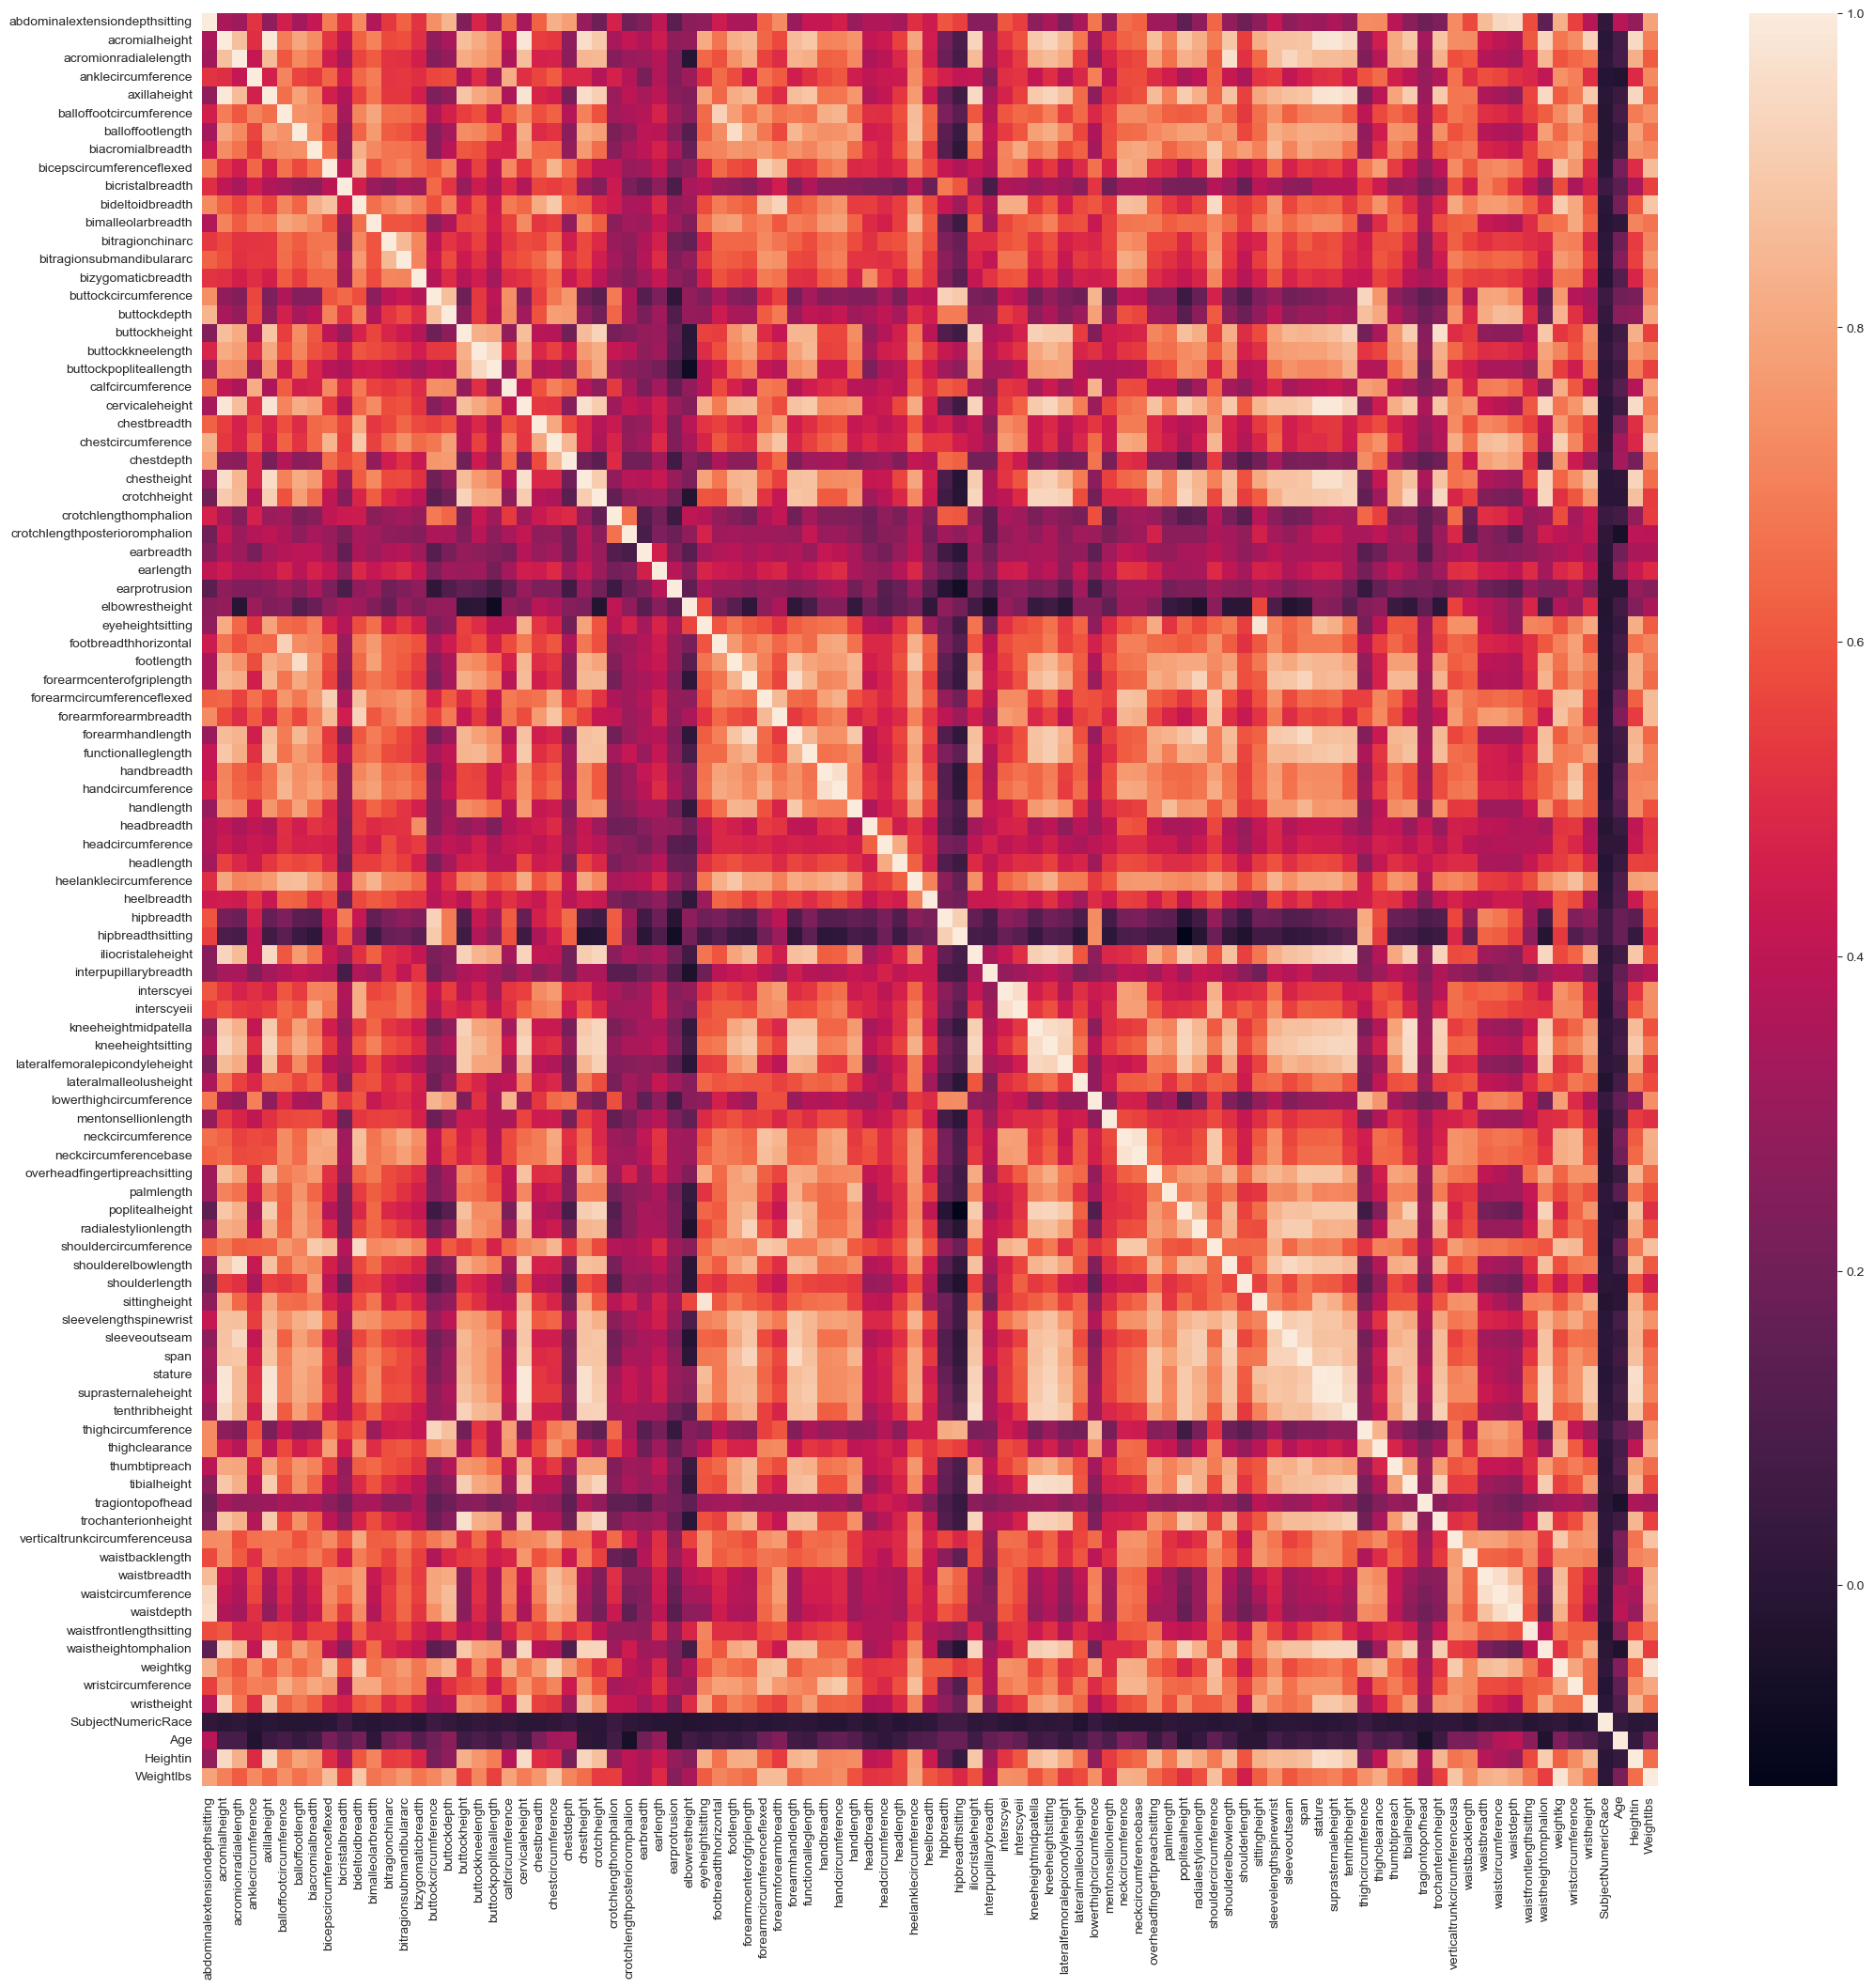

In [66]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())


In [67]:
df[["weightkg","Heightin","Weightlbs"]]

,weightkg,Heightin,Weightlbs
0,657,61,142
1,534,64,120
2,663,68,147
3,782,66,175
4,886,63,195
...,...,...,...
6063,675,67,160
6064,896,71,194
6065,832,67,186
6066,731,69,165


In [68]:
df.drop(["Heightin","Weightlbs"],axis=1,inplace=True)

In [69]:
df.reset_index(drop=True,inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [71]:
X=df.drop("DODRace",axis=1)
y=df["DODRace"]

In [72]:
y.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)


In [74]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [75]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [76]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [78]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [79]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [80]:
import sklearn
sklearn.__version__

'1.1.3'

In [81]:
import xgboost
xgboost.__version__

'1.7.2'

In [85]:
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [86]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   6]
 [  8 103  25]
 [ 19  97 642]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.49      0.76      0.59       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 970   39   29]
 [  20  460   63]
 [  63  353 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [87]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [88]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.505107
train_precision_Hispanic    0.540403
test_recall_Hispanic        0.791886
train_recall_Hispanic       0.850419
test_f1_Hispanic            0.615757
train_f1_Hispanic           0.660848
dtype: float64

### Logistic Model GridsearchCV

In [89]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [90]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [91]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [93]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_f78b34af0de34e488a42846aed2993f4/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_f78b34af0de34e488a42846aed2993f4/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_f78b34af0de34e488a42846aed2993f4/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_f78b34af0de34e488a42846aed2993f4/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_f78b34af0de34e488a42846aed2993f4/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_f78b34af0de34e488a42846aed2993f4/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_f78b34af0de34e488a42846aed2993f4/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_f78b34af0de34e488a42846aed2993f4/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [94]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [95]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [96]:
log_model_grid.best_index_

7

In [97]:
pd.DataFrame(log_model_grid.cv_results_).loc[7, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.791886
mean_train_score    0.850419
Name: 7, dtype: object

In [98]:
log_model_grid.best_score_

0.7918855218855219

In [99]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   6]
 [  8 103  25]
 [ 19  97 642]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.49      0.76      0.59       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 970   39   29]
 [  20  460   63]
 [  63  353 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



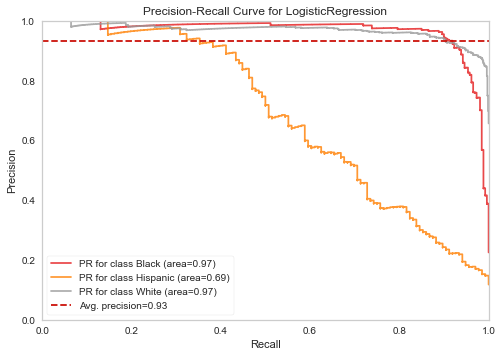

[CV 2/10] END log__C=0.5, log__penalty=l1, log__solver=liblinear;, score=(train=0.664, test=0.691) total time=   6.0s
[CV 7/10] END log__C=0.5, log__penalty=l1, log__solver=liblinear;, score=(train=0.685, test=0.574) total time=   6.4s
[CV 1/10] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10] END log__C=0.5, log__penalty=l2, log__solver=liblinear;, score=(train=0.678, test=0.673) tota

[CV 3/10] END log__C=0.5, log__penalty=l1, log__solver=liblinear;, score=(train=0.684, test=0.618) total time=   5.8s
[CV 5/10] END log__C=0.5, log__penalty=l1, log__solver=liblinear;, score=(train=0.675, test=0.741) total time=   6.1s
[CV 9/10] END log__C=0.5, log__penalty=l1, log__solver=liblinear;, score=(train=0.658, test=0.722) total time=   7.2s
[CV 3/10] END log__C=0.5, log__penalty=l2, log__solver=lbfgs;, score=(train=0.838, test=0.836) total time=   5.1s
[CV 7/10] END log__C=0.5, log__penalty=l2, log__solver=lbfgs;, score=(train=0.847, test=0.722) total time=   2.9s
[CV 1/10] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=(train=0.711, test=0.655) total time=   9.6s
[CV 5/10] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=(train=0.699, test=0.759) total time=   9.6s
[CV 10/10] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=(train=0.701, test=0.704) total time=  11.8s
[CV 6/10] END log__C=1, log__penalty=l2, log__solver=lbfgs;, score=(t

In [100]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [102]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


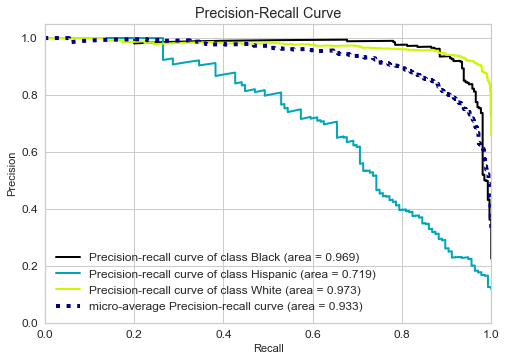

In [103]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [104]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.7190880384976904

In [105]:
viz.score_#["Hispanic"]

{'Black': 0.9668089695746755,
 'Hispanic': 0.6855800416951516,
 'White': 0.9680611619776148,
 'micro': 0.9313996511024871}

In [106]:
viz.score_["Hispanic"]

0.6855800416951516

In [107]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

Lojistic Regression solver "liblenear" for small dataset

In [108]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                    random_state=101, solver="liblinear", penalty="l1"))]

pipe_log_model_libl = Pipeline(steps=operations)

In [109]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[244   7   9]
 [  9  84  43]
 [ 16  38 704]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92       260
    Hispanic       0.65      0.62      0.63       136
       White       0.93      0.93      0.93       758

    accuracy                           0.89      1154
   macro avg       0.83      0.83      0.83      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[ 977   15   46]
 [  29  384  130]
 [  49  146 2839]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.70      0.71      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [110]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, 
                                                                    random_state=101,solver="liblinear", penalty="l1"))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.668868
train_precision_Hispanic    0.703772
test_recall_Hispanic        0.661077
train_recall_Hispanic       0.706772
test_f1_Hispanic            0.663983
train_f1_Hispanic           0.705248
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [111]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [112]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  7 102  27]
 [ 19 133 606]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.41      0.75      0.53       136
       White       0.95      0.80      0.87       758

    accuracy                           0.82      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[ 957   38   43]
 [  22  457   64]
 [  57  445 2532]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.83      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [113]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.452571
train_precision_Hispanic    0.482086
test_recall_Hispanic        0.788081
train_recall_Hispanic       0.842643
test_f1_Hispanic            0.573859
train_f1_Hispanic           0.613243
dtype: float64

###  SVC Model GridsearchCV

In [114]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [115]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [116]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ad0ece7006544e87970c82f99e0b9a90/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ad0ece7006544e87970c82f99e0b9a90/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ad0ece7006544e87970c82f99e0b9a90/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ad0ece7006544e87970c82f99e0b9a90/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ad0ece7006544e87970c82f99e0b9a90/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ad0ece7006544e87970c82f99e0b9a90/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [117]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [118]:
svm_model_grid.best_index_

3

In [119]:
pd.DataFrame(svm_model_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.788081
mean_train_score    0.842643
Name: 3, dtype: object

In [120]:
svm_model_grid.best_score_

0.7880808080808082

In [121]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  7 102  27]
 [ 19 133 606]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.41      0.75      0.53       136
       White       0.95      0.80      0.87       758

    accuracy                           0.82      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[ 957   38   43]
 [  22  457   64]
 [  57  445 2532]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.83      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



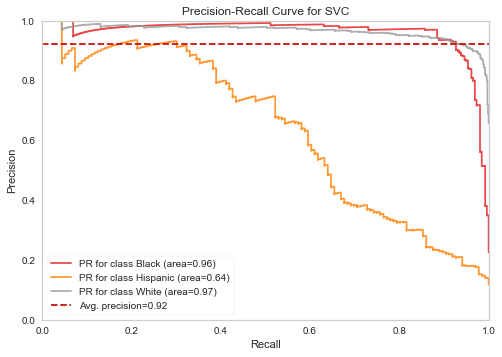

In [122]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

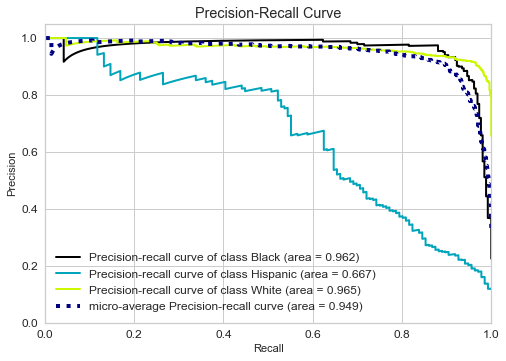

In [123]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101, probability=True))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

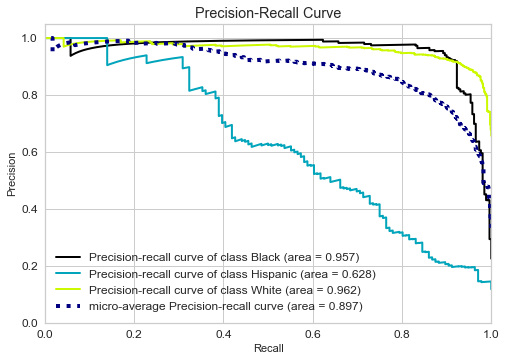

In [124]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [125]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

[CV 4/10] END svc__C=0.5, svc__gamma=scale;, score=(train=0.834, test=0.685) total time=  11.9s
[CV 7/10] END svc__C=0.5, svc__gamma=scale;, score=(train=0.836, test=0.685) total time=   9.5s
[CV 10/10] END svc__C=0.5, svc__gamma=scale;, score=(train=0.828, test=0.778) total time=   9.9s
[CV 4/10] END svc__C=0.5, svc__gamma=auto;, score=(train=0.703, test=0.630) total time=  14.4s
[CV 8/10] END svc__C=0.5, svc__gamma=auto;, score=(train=0.708, test=0.574) total time=  13.0s
[CV 2/10] END svc__C=0.5, svc__gamma=0.01;, score=(train=0.744, test=0.800) total time=  11.1s
[CV 6/10] END svc__C=0.5, svc__gamma=0.01;, score=(train=0.744, test=0.741) total time=  12.8s
[CV 10/10] END svc__C=0.5, svc__gamma=0.01;, score=(train=0.759, test=0.741) total time=  16.7s
[CV 6/10] END svc__C=1, svc__gamma=scale;, score=(train=0.847, test=0.759) total time=   9.4s
[CV 9/10] END svc__C=1, svc__gamma=scale;, score=(train=0.836, test=0.889) total time=   9.4s
[CV 3/10] END svc__C=1, svc__gamma=auto;, score

## 3. RF

### Vanilla RF Model

In [126]:
cat

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [127]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [129]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[243   8   9]
 [ 24  99  13]
 [  8  16 734]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.91       260
    Hispanic       0.80      0.73      0.76       136
       White       0.97      0.97      0.97       758

    accuracy                           0.93      1154
   macro avg       0.89      0.88      0.88      1154
weighted avg       0.93      0.93      0.93      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [130]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.860448
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.624295
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.722366
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [131]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]

In [132]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [133]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_a29b04d4042a425c815ebe36bb5da79a/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_a29b04d4042a425c815ebe36bb5da79a/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [134]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=101))])

In [135]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [136]:
rf_grid_model.best_index_

2

In [137]:
pd.DataFrame(rf_grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.776979
mean_train_score    0.801574
Name: 0, dtype: object

In [138]:
rf_grid_model.best_score_

0.8028372409106355

In [139]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[223  36   1]
 [ 19 113   4]
 [ 10  41 707]]
              precision    recall  f1-score   support

       Black       0.88      0.86      0.87       260
    Hispanic       0.59      0.83      0.69       136
       White       0.99      0.93      0.96       758

    accuracy                           0.90      1154
   macro avg       0.82      0.87      0.84      1154
weighted avg       0.92      0.90      0.91      1154


Train_Set
[[ 895  137    6]
 [  64  454   25]
 [  37  125 2872]]
              precision    recall  f1-score   support

       Black       0.90      0.86      0.88      1038
    Hispanic       0.63      0.84      0.72       543
       White       0.99      0.95      0.97      3034

    accuracy                           0.91      4615
   macro avg       0.84      0.88      0.86      4615
weighted avg       0.93      0.91      0.92      4615



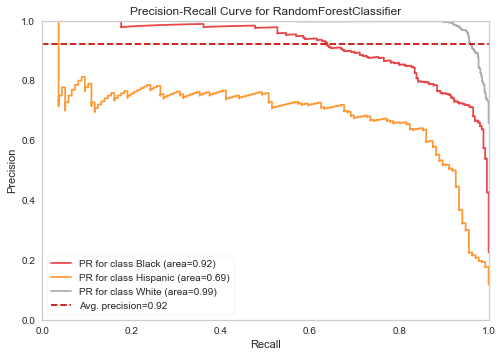

In [140]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [141]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [143]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [144]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index = y_train.index)

comp["label"] = y_train
comp.head()

,weights,label
958,2.833026,Hispanic
265,0.507031,White
4388,0.507031,White
3666,0.507031,White
2721,1.482017,Black


[CV 4/5] END RF_model__max_depth=2, RF_model__n_estimators=400;, score=(train=0.772, test=0.630) total time=   4.5s
[CV 5/5] END RF_model__max_depth=2, RF_model__n_estimators=400;, score=(train=0.811, test=0.824) total time=   3.9s
[CV 4/5] END RF_model__max_depth=2, RF_model__n_estimators=500;, score=(train=0.775, test=0.639) total time=   4.3s
[CV 3/5] END RF_model__max_depth=3, RF_model__n_estimators=400;, score=(train=0.843, test=0.807) total time=   4.0s
[CV 2/5] END RF_model__max_depth=3, RF_model__n_estimators=500;, score=(train=0.848, test=0.771) total time=   5.0s
[CV 3/5] END RF_model__max_depth=2, RF_model__n_estimators=400;, score=(train=0.811, test=0.789) total time=   4.6s
[CV 3/5] END RF_model__max_depth=2, RF_model__n_estimators=500;, score=(train=0.804, test=0.771) total time=   4.8s
[CV 1/5] END RF_model__max_depth=3, RF_model__n_estimators=400;, score=(train=0.843, test=0.890) total time=   4.1s
[CV 4/5] END RF_model__max_depth=3, RF_model__n_estimators=400;, score=(

In [145]:
comp.groupby("label")["weights"].value_counts()

label     weights 
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: weights, dtype: int64

In [148]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Black' 'Hispanic' 'White']

In [147]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

NotFittedError: need to call fit or load_model beforehand

In [149]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py", line 1466, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Black' 'Hispanic' 'White']


### XGBoost Model GridsearchCV

In [150]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [151]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic,
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [152]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ff3656113225412a89767d831da05cfc/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ff3656113225412a89767d831da05cfc/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ff3656113225412a89767d831da05cfc/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 299  239  223 ...  236  272  226]
 [1340 1399 1429 ... 1469 1360 1430]
 [ 322  321  336 ...  320  327  326]
 ...
 [ 812  840  822 ...  882  775  852]
 [   3    1    1 ...    1    2    1]
 [  28   37   31 ...   24   43   22]] loaded from the file /var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/joblib_memmapping_folder_3191_bbfae7b3e2da4ff289996f553dfa1cd5_ff3656113225412a89767d831da05cfc/3191-140486797266704-c7147ab4b67c415b9ae524d3096a57cf.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [

ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py", line 1466, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Black' 'Hispanic' 'White']


In [159]:
xgb_grid_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [155]:
xgb_grid_model.best_index_

AttributeError: 'GridSearchCV' object has no attribute 'best_index_'

In [156]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [157]:
!pip install scikit-plot

In [158]:
conda install -c conda-forge scikit-plot

Solving environment: done

## Package Plan ##

  environment location: /Users/arifkirsakal/opt/anaconda3

  added / updated specs:
    - scikit-plot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-plot-0.3.7          |             py_1          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          25 KB

The following NEW packages will be INSTALLED:

  scikit-plot        conda-forge/noarch::scikit-plot-0.3.7-py_1 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [160]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                            max_depth=2, n_estimators=20, objective='multi:softprob', random_state=101,
                                            subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Black' 'Hispanic' 'White']

In [161]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.6669460034101624

In [162]:
y_test_dummies

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [163]:
y_pred_proba

array([[3.88107906e-01, 1.70574379e-02, 5.94834656e-01],
       [1.95710320e-04, 2.79272834e-01, 7.20531456e-01],
       [5.24135008e-03, 2.47462135e-01, 7.47296515e-01],
       ...,
       [2.76758990e-03, 3.08637688e-03, 9.94146033e-01],
       [2.58974127e-03, 7.52618432e-02, 9.22148415e-01],
       [2.67262287e-03, 1.84163759e-01, 8.13163618e-01]])

In [164]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [82]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 927.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [83]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [84]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___